# Analyze A/B Test Results 

This project will assure you have mastered the subjects covered in the statistics lessons. We have organized the current notebook into the following sections: 

- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Final Check](#finalcheck)
- [Submission](#submission)

Specific programming tasks are marked with a **ToDo** tag. 

<a id='intro'></a>
## Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should:
- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision.

Each **ToDo** task below has an associated quiz present in the classroom.  Though the classroom quizzes are **not necessary** to complete the project, they help ensure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the [rubric](https://review.udacity.com/#!/rubrics/1214/view) specification. 



<a id='probability'></a>
## Part I - Probability

To get started, let's import our libraries.

In [61]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

### ToDo 1.1
Now, read in the `ab_data.csv` data. Store it in `df`. Below is the description of the data, there are a total of 5 columns:

<center>

|Data columns|Purpose|Valid values|
| ------------- |:-------------| -----:|
|user_id|Unique ID|Int64 values|
|timestamp|Time stamp when the user visited the webpage|-|
|group|In the current A/B experiment, the users are categorized into two broad groups. <br>The `control` group users are expected to be served with `old_page`; and `treatment` group users are matched with the `new_page`. <br>However, **some inaccurate rows** are present in the initial data, such as a `control` group user is matched with a `new_page`. |`['control', 'treatment']`|
|landing_page|It denotes whether the user visited the old or new webpage.|`['old_page', 'new_page']`|
|converted|It denotes whether the user decided to pay for the company's product. Here, `1` means yes, the user bought the product.|`[0, 1]`|
</center>
Use your dataframe to answer the questions in Quiz 1 of the classroom.




**a.** Read in the dataset from the `ab_data.csv` file and take a look at the top few rows here:

In [62]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


**b.** Use the cell below to find the number of rows in the dataset.

In [63]:
df.shape[0]

294478

**c.** The number of unique users in the dataset.

In [64]:
df.user_id.nunique()

290584

**d.** The proportion of users converted.

In [65]:
(df.converted == 1).mean()

0.11965919355605512

**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [66]:
df.query('group == "treatment" and landing_page != "new_page"').user_id.nunique()

1965

**f.** Do any of the rows have missing values?

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


### ToDo 1.2  
In a particular row, the **group** and **landing_page** columns should have either of the following acceptable values:

|user_id| timestamp|group|landing_page|converted|
|---|---|---|---|---|
|XXXX|XXXX|`control`| `old_page`|X |
|XXXX|XXXX|`treatment`|`new_page`|X |


It means, the `control` group users should match with `old_page`; and `treatment` group users should matched with the `new_page`. 

However, for the rows where `treatment` does not match with `new_page` or `control` does not match with `old_page`, we cannot be sure if such rows truly received the new or old wepage.  


Use **Quiz 2** in the classroom to figure out how should we handle the rows where the group and landing_page columns don't match?

**a.** Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [ ]:
# Remove the inaccurate rows, and store the result in a new dataframe df2

In [68]:
df_trne = df.query('group == "treatment" and landing_page == "new_page"')
df_trne.nunique()

user_id         145310
timestamp       145311
group                1
landing_page         1
converted            2
dtype: int64

In [69]:
df_ctol = df.query('group == "control" and landing_page == "old_page"')
df_ctol.nunique()

user_id         145274
timestamp       145274
group                1
landing_page         1
converted            2
dtype: int64

In [70]:
df2 = df_trne.append(df_ctol, ignore_index = True)
df2.head()

,user_id,timestamp,group,landing_page,converted
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [71]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

### ToDo 1.3  
Use **df2** and the cells below to answer questions for **Quiz 3** in the classroom.

**a.** How many unique **user_id**s are in **df2**?

In [72]:
df2.shape[0]

290585

**b.** There is one **user_id** repeated in **df2**.  What is it?

In [73]:
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
1404,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**c.** Display the rows for the duplicate **user_id**? 

In [74]:
df2.query('user_id == 773192')

,user_id,timestamp,group,landing_page,converted
938,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
1404,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [131]:
# Remove one of the rows with a duplicate user_id..
# Hint: The dataframe.drop_duplicates() may not work in this case because the rows with duplicate user_id are not entirely identical. 

# Check again if the row with a duplicate user_id is deleted or not


In [75]:
df2.drop([1404], axis='index', inplace = True)

In [76]:
df2.query('user_id == 773192') # confirmation

,user_id,timestamp,group,landing_page,converted
938,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


### ToDo 1.4  
Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

**a.** What is the probability of an individual converting regardless of the page they receive?<br><br>



In [77]:
p_pop = df2.query('converted == 1').user_id.nunique()
p_pop

34753

In [78]:
p_con = p_pop/df2.shape[0]
p_con

0.11959708724499628

**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [79]:
p_ctr = df2.query('group == "control" and converted == 1').user_id.nunique()
p_ctr

17489

In [80]:
p_grc = df2.query('group == "control"').user_id.nunique()
p_grc

145274

In [81]:
p_ctnv = p_ctr/p_grc
p_ctnv

0.1203863045004612

**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [82]:
p_tre = df2.query('group == "treatment" and converted == 1').user_id.nunique()
p_tre

17264

In [83]:
p_grt = df2.query('group == "treatment"').user_id.nunique()
p_grt

145310

In [84]:
p_trnv = p_tre/p_grt
p_trnv

0.11880806551510564

In [85]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups.
obs_diff = p_trnv - p_ctnv
obs_diff

-0.0015782389853555567

**d.** What is the probability that an individual received the new page?

In [86]:
df2.query('landing_page == "new_page"').user_id.nunique()/df2.shape[0]

0.5000619442226688

**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

>**Your answer goes here.**

It can be concluded that the control group has more conversion than the treatment group. This is because out of the 145,274 unique users in the control group, 17489 were converted as compared to the treatment group where out of 145,310 unique users in the treatment group, 17264 were converted. The control group has few lesser unique users than the treatment group and still has more users converted. Overall, the percentage of unique users converted in the control group was 12.03% as against 11.88% for the treatment group.

<a id='ab_test'></a>
## Part II - A/B Test

Since a timestamp is associated with each event, you could run a hypothesis test continuously as long as you observe the events. 

However, then the hard questions would be: 
- Do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  
- How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


### ToDo 2.1
For now, consider you need to make the decision just based on all the data provided.  

> Recall that you just calculated that the "converted" probability (or rate) for the old page is *slightly* higher than that of the new page (ToDo 1.4.c). 

If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should be your null and alternative hypotheses (**$H_0$** and **$H_1$**)?  

You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the "converted" probability (or rate) for the old and new pages respectively.

>**Put your answer here.**

   $H_0$: Pnew <= Pold  and $H_1$: Pnew > Pold

### ToDo 2.2 - Null Hypothesis $H_0$ Testing
Under the null hypothesis $H_0$, assume that $p_{new}$ and $p_{old}$ are equal. Furthermore, assume that $p_{new}$ and $p_{old}$ both are equal to the **converted** success rate in the `df2` data regardless of the page. So, our assumption is: <br><br>
<center>
$p_{new}$ = $p_{old}$ = $p_{population}$
</center>

In this section, you will: 

- Simulate (bootstrap) sample data set for both groups, and compute the  "converted" probability $p$ for those samples. 


- Use a sample size for each group equal to the ones in the `df2` data.


- Compute the difference in the "converted" probability for the two samples above. 


- Perform the sampling distribution for the "difference in the converted probability" between the two simulated-samples over 10,000 iterations; and calculate an estimate. 



Use the cells below to provide the necessary parts of this simulation.  You can use **Quiz 5** in the classroom to make sure you are on the right track.

**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [87]:
p_new = (df2.converted == 1).mean()
p_new

0.11959708724499628

**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [88]:
p_old = (df2.converted == 1).mean()
p_old

0.11959708724499628

**c.** What is $n_{new}$, the number of individuals in the treatment group? <br><br>

In [104]:
n_new = df2.query('group == "treatment"').user_id.nunique()
n_new

145310

**d.** What is $n_{old}$, the number of individuals in the control group?

In [105]:
n_old = df2.query('group == "control"').user_id.nunique()
n_old

145274

**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.  <br><br>

In [106]:
# Simulate a Sample for the treatment Group
new_page_converted = np.random.choice([0,1], size = n_new, p = [1-p_new, p_new])

In [107]:
new_page_converted = np.array(new_page_converted)

In [108]:
new_page_converted.mean()

0.11946872204252977

**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [109]:
# Simulate a Sample for the control Group
old_page_converted = np.random.choice([0,1], size = n_old, p = [1-p_old, p_old])

In [110]:
old_page_converted = np.array(old_page_converted)

In [111]:
old_page_converted.mean()

0.11967729944793976

**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [112]:
converted_diff = new_page_converted.mean() - old_page_converted.mean()
converted_diff

-0.00020857740540998482


**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. 

<br>
Store all  $(p{'}_{new}$ - $p{'}_{old})$  values in a NumPy array called `p_diffs`.

In [113]:
# Sampling distribution 
p_diffs = []

for _ in range(10000):
    new_page_converted = np.random.choice([0,1], size = n_new, p=[1-p_new, p_new])
    old_page_converted = np.random.choice([0,1], size = n_old, p=[1-p_old, p_old])
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

In [114]:
p_diffs = np.array(p_diffs)

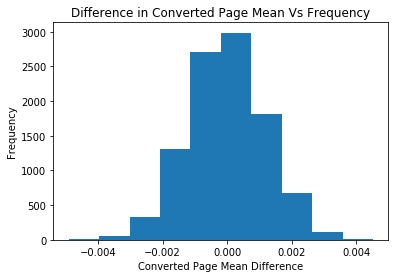

In [116]:
plt.hist(p_diffs);
plt.title("Difference in Converted Page Mean Vs Frequency")
plt.xlabel("Converted Page Mean Difference")
plt.ylabel("Frequency");

**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.<br><br>

Also, use `plt.axvline()` method to mark the actual difference observed  in the `df2` data (recall `obs_diff`), in the chart.

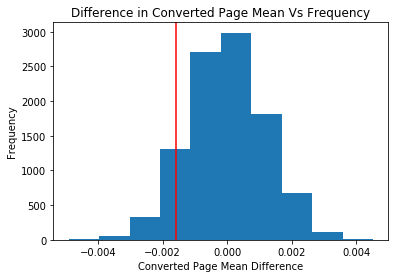

In [117]:
plt.hist(p_diffs);
plt.axvline(x=obs_diff, color = 'red');
plt.title("Difference in Converted Page Mean Vs Frequency")
plt.xlabel("Converted Page Mean Difference")
plt.ylabel("Frequency");

**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [118]:
(p_diffs > obs_diff).mean()

0.90820000000000001

**k.** Please explain in words what you have just computed in part **j** above.  
 - What is this value called in scientific studies?  
 - What does this value signify in terms of whether or not there is a difference between the new and old pages? *Hint*: Compare the value above with the "Type I error rate (0.05)". 

>**Put your answer here.**

It is called a p-value in Scientific studies.

The p-value of 0.9 suggests a large p-value and this signify it is more likely from the null and less likely from the alternative hypothesis which concludes it tends towards the old page.

Also, comparing the value to type I error rate of 0.05, it falls into the category of p-value>= 0.05 and this signifies that it fails to reject null and rejects alternatives which means it also tends towards the old page

N.B- null is old page and alternatives is the new page.




**l. Using Built-in Methods for Hypothesis Testing**<br>
We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. 

Fill in the statements below to calculate the:
- `convert_old`: number of conversions with the old_page
- `convert_new`: number of conversions with the new_page
- `n_old`: number of individuals who were shown the old_page
- `n_new`: number of individuals who were shown the new_page


In [121]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = df2.query('landing_page == "old_page" and converted == 1').user_id.nunique()

# number of conversions with the new_page
convert_new = df2.query('landing_page == "new_page" and converted == 1').user_id.nunique()

# number of individuals who were shown the old_page
n_old = df2.query('group == "control"').user_id.nunique()

# number of individuals who received new_page
n_new = df2.query('group == "treatment"').user_id.nunique()

**m.** Now use `sm.stats.proportions_ztest()` to compute your test statistic and p-value.  [Here](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html) is a helpful link on using the built in.

The syntax is: 
```bash
proportions_ztest(count_array, nobs_array, alternative='larger')
```
where, 
- `count_array` = represents the number of "converted" for each group
- `nobs_array` = represents the total number of observations (rows) in each group
- `alternative` = choose one of the values from `[‘two-sided’, ‘smaller’, ‘larger’]` depending upon two-tailed, left-tailed, or right-tailed respectively. 

The built-in function above will return the z_score, p_value. 

---
### About the two-sample z-test
Recall that you have plotted a distribution `p_diffs` representing the
difference in the "converted" probability  $(p{'}_{new}-p{'}_{old})$  for your two simulated samples 10,000 times. 

Another way for comparing the mean of two independent and normal distribution is a **two-sample z-test**. You can perform the Z-test to calculate the Z_score, as shown in the equation below:

$$
Z_{score} = \frac{ (p{'}_{new}-p{'}_{old}) - (p_{new}  -  p_{old})}{ \sqrt{ \frac{\sigma^{2}_{new} }{n_{new}} + \frac{\sigma^{2}_{old} }{n_{old}}  } }
$$

where,
- $p{'}$ is the "converted" success rate in the sample
- $p_{new}$ and $p_{old}$ are the "converted" success rate for the two groups in the population. 
- $\sigma_{new}$ and $\sigma_{new}$ are the standard deviation for the two groups in the population. 
- $n_{new}$ and $n_{old}$ represent the size of the two groups or samples (it's same in our case)


>Z-test is performed when the sample size is large, and the population variance is known. The z-score represents the distance between the two "converted" success rates in terms of the standard error. 

Next step is to make a decision to reject or fail to reject the null hypothesis based on comparing these two values: 
- $Z_{score}$
- $Z_{\alpha}$ or $Z_{0.05}$, also known as critical value at 95% confidence interval.  $Z_{0.05}$ is 1.645 for one-tailed tests,  and 1.960 for two-tailed test. You can determine the $Z_{\alpha}$ from the z-table manually. 

Decide if your hypothesis is either a two-tailed, left-tailed, or right-tailed test. Accordingly, reject OR fail to reject the  null based on the comparison between $Z_{score}$ and $Z_{\alpha}$. We determine whether or not the $Z_{score}$ lies in the "rejection region" in the distribution. In other words, a "rejection region" is an interval where the null hypothesis is rejected iff the $Z_{score}$ lies in that region.




Reference: 
- Example 9.1.2 on this [page](https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Book%3A_Introductory_Statistics_(Shafer_and_Zhang)/09%3A_Two-Sample_Problems/9.01%3A_Comparison_of_Two_Population_Means-_Large_Independent_Samples), courtesy www.stats.libretexts.org

---



In [122]:
import statsmodels.api as sm
# ToDo: Complete the sm.stats.proportions_ztest() method arguments
z_score, p_value = sm.stats.proportions_ztest(np.array([17264,17489]), np.array([145310,145274]), alternative= 'larger')
print(z_score, p_value)

-1.31092419842 0.905058312759


**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?<br><br>



>**Put your answer here.**

The p-value of 0.9050 is greater than 0.01, this signifies it is unlikely that our statistic is from alternatives, hence we stick to the null, we fail to reject the null.

However, the Z_score of -1.31  is less than the Z_alpha which is 1.645 for a right-tailed test where alpha=0.05, hence we fail to reject the null and stick to null.

<a id='regression'></a>
### Part III - A regression approach

### ToDo 3.1 
In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

>**Put your answer here.**

Logistic Regression

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [123]:
df2['intercept'] = 1

In [124]:
df2['group'] = df2['group'].astype('category')

In [125]:
df2['ab_page'] = df2['group'].cat.codes
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1


**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [126]:
Logit_mod = sm.Logit(df2['converted'], df2[['intercept','ab_page']])

In [127]:
results = Logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [128]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-08-10 14:23 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  


>**Put your answer here.**

The p-value is 0.1897. A p-value of 0.1897 signifies that the model is not  statistically significant. A p-value of 0.1897 which is > 0.01, it is unlikely that our statistic is from alternatives hence we fail to reject null which means that it tends towards the null that brings into conclusion that the new page should not be launched and the old page should be retained. 

In comparison with type I error rate of 0.05, recall that when p-value > or = error rate(alpha), we fail to reject null and stick to the null hence since our p-value = 0.1897, we tend towards the null(old-page).

Furthermore our null which is the old page is e^(0.1897) = 1.2088 times better than the new page.

The p-value differs from each other because Part II performs a sampling distribution from random variables which is basically theoretical assumptions while part III performs logistic regression model which takes value from your linear regression line and maps it between zero and one as probability i.e a binary random variable that takes on the value 1 (for the class of interest) with some probability p, and the value 0 with probability 1 − p.

**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

>**Put your answer here.**

It is a good idea to consider other factors to add into the regression model because it would give a broader scope within which decisions can be influenced other than just the landing_page. 

However, there are disadvantages of adding additional items into my regression model because it creates potention problems such as 
1 You might have correlated errors.
2 You might have outliers or leverage points that hurt your model.
3 You might have more linearity that is, Multicollinearity.
4 A linear relationship may not exist between your response and predictor variable.

**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 

1. You will need to read in the **countries.csv** dataset and merge together your `df2` datasets on the appropriate rows. You call the resulting dataframe `df_merged`. [Here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) are the docs for joining tables. 

2. Does it appear that country had an impact on conversion?  To answer this question, consider the three unique values, `['UK', 'US', 'CA']`, in the `country` column. Create dummy variables for these country columns. 

 Provide the statistical output as well as a written response to answer this question.

In [129]:
# Read the countries.csv

dy = pd.read_csv('countries.csv')
dy.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [130]:
# Join with the df2 dataframe
df3 = df2.join(dy, on=None, how='left', lsuffix = '_pg', rsuffix= '_cty')
df3.head(2)

,user_id_pg,timestamp,group,landing_page,converted,intercept,ab_page,user_id_cty,country
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,834778.0,UK
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,928468.0,US


In [131]:
df3 = df2.set_index('user_id').join(dy.set_index('user_id'))
df3.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country
user_id,,,,,,,
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,CA
817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,UK
839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,CA


In [132]:
df3.isnull().sum()

timestamp       0
group           0
landing_page    0
converted       0
intercept       0
ab_page         0
country         0
dtype: int64

In [133]:
# Create the necessary dummy variables
df3[['CA','UK','US']] = pd.get_dummies(df3['country'])
df3.head(3)

,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US
user_id,,,,,,,,,,
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,CA,1,0,0


In [135]:
Logit_mod = sm.Logit(df3['converted'], df3[['intercept','ab_page','US','CA']])
results = Logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [136]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-08-10 14:37 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9794    0.0127  -155.4145  0.0000  -2.0044  -1.9544
ab_page      -0.0149    0.0114    -1.3069  0.1912  -0.0374   0.0075
US           -0.0099    0.0133    -0.7433  0.4573  -0.0359   0.0162
CA           -0.0506    0.0284    -1.7835  0.0745  -0.1063   0.0050
==================================================================

"""

**h. Fit your model and obtain the results**<br> 
Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if are there significant effects on conversion.  **Create the necessary additional columns, and fit the new model.** 


Provide the summary results (statistical output), and your conclusions (written response) based on the results. 


In [152]:
# Fit your model, and summarize the results
df3['ab_US'] = df3['ab_page'] * df3['US']
df3['ab_CA'] = df3['ab_page'] * df3['CA']

In [153]:
df3.head(2)

,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US,ab_UK,ab_CA,ab_US
user_id,,,,,,,,,,,,,
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1,0,0,1
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1,0,0,1


In [156]:
Logit_mod = sm.Logit(df3['converted'], df3[['intercept','ab_page','US','CA','ab_US', 'ab_CA']])
results = Logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


In [157]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-08-10 14:52 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9922    0.0161  -123.4571  0.0000  -2.0238  -1.9606
ab_page       0.0108    0.0228     0.4749  0.6349  -0.0339   0.0555
US            0.0057    0.0188     0.3057  0.7598  -0.0311   0.0426
CA           -0.0118    0.0398    -0.2957  0.7674  -0.0899   0.0663
ab_US        -0.0314    0.0266    -1.1807  0.2377  -0.0835   0.0207
ab_CA        -0.0783    0.0568    -1.3783  0.1681  -0.1896   0.0330
==================================================================

"""

>**Put your conclusion answer here.**

With p-values of ab-page= 0.19, p-value of US=0.457 and p-value of CA=0.074, it can be shown that both the page and the country are not statistically significant but are practically significant. The ab_page p-value suggests that its unlikely our statistic is from alternatives hence we fail to reject null which means it tends towards null that comes to the conclusion that the old_page should be retained. This is also applicable to the p-values of US and CA respectively using UK as a baseline, their p-values also suggests to stick to null. 

For the second regression model, the p-values are as follows ab_page=0.6349, US=0.7598, CA=0.7674, ab_US=0.2377, ab_CA= 0.1681. These p-values are all greater than 0.01 which concludes that it fails to reject null and reject alternative hypothessis, hence, the old page should be retained.

However, in comparison with type I error rate of 0.05, the three p-values for the page and countries falls in the category > or = alpha , which concludes to reject the alternative and stick to null i.e fail to reject null.

The effect of page and country to predict conversion is not statistically significant but practically significant.

 Indeed, we do not find the new page providing us any significant benefit regarding new user conversions. The old page should be good for now. We can always make another experiment in the future if the circumstances change.

<a id='finalcheck'></a>
## Final Check!

Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!



<a id='submission'></a>
## Submission
You may either submit your notebook through the "SUBMIT PROJECT" button at the bottom of this workspace, or you may work from your local machine and submit on  the last page of this project lesson.  

1. Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).


2. Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.


3. Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [158]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0